# Lab Assignment One: Exploring Table Data



# 1. Business Understanding

Video game sales has 64017 observations and 14 features, including both
numerical and categorical features. It matches the Lab One requirement and is free to download at kaggle.com.

Through visualizing the features, analyzing their relationships, and other methods, we are able to help the video game studio understand the most profitable type of video game they should develop.

Through analysis of the data, the video game company could be able to best determine what genre of video game they should program. This allows them to be able to make the most profit.


========================================================================

Dataset: Video Game Sales 2024
    
URL: https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024?resource=download

Question Of Interest: What genre of video games would be the most profitable?


# 2. Data Understanding
2.1 Data Description

In [33]:
# load the human-resourse dataset
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C://Users//ethan//Downloads//archive//vgchartz-2024.csv')

df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [34]:
# find the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None


Based on the dataframe information, while 5 of the columns had no missing values,the remaining columns are missing values most likely because either the game was not released in a certain region or was not released yet. These columns appear to be numerical.

Since there are missing values in the dataset, we can use mean or median imputation for the numerical features, and mode for the categorical features. 

In [35]:
# find the data summary
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [36]:
# Find the earliest date and most recent date
from io import StringIO

# Ensure dates are in datetime format
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

# Calculate the date ranges
release_date_range = (df['release_date'].min(), df['release_date'].max())
last_update_date_range = (df['last_update'].min(), df['last_update'].max())

release_date_range, last_update_date_range

((Timestamp('1971-12-03 00:00:00'), Timestamp('2024-12-31 00:00:00')),
 (Timestamp('2017-11-28 00:00:00'), Timestamp('2024-01-28 00:00:00')))

In [37]:


# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = df.columns
data_des['Description'] = ['Image', 'Title',
                          'Console', 'Genre',
                          'Publisher', 'Developer',
                          'Critic Score', 'Total Sales',
                          'NA Sales', 'JP Sales' , 'PAL Sales',
                            'Other Sales',
                          'Release Date', 'Last Update']
data_des['Scales'] = ['Not Applicable'] * 6 + ['Ordinal'] + ['Interval'] * 5 + ['Interval'] * 2
data_des['Discrete\Continuous'] = ['Not Applicable'] * 6 + ['Continuous'] * 6 + ['Discrete'] * 2
data_des['Range'] = ['Not Applicable'] * 6 + ['1.00-10.00']  + ['0.00 - 20.32'] + ['0.00 - 9.76'] + ['0.00 - 2.13'] + ['0.00 - 9.85'] + ['0.00 - 3.12'] + ['1971-12-03 to 2024-12-31'] + ['2017-11-28 to 2024-01-28']


data_des



,Features,Description,Scales,Discrete\Continuous,Range
0,img,Image,Not Applicable,Not Applicable,Not Applicable
1,title,Title,Not Applicable,Not Applicable,Not Applicable
2,console,Console,Not Applicable,Not Applicable,Not Applicable
3,genre,Genre,Not Applicable,Not Applicable,Not Applicable
4,publisher,Publisher,Not Applicable,Not Applicable,Not Applicable
5,developer,Developer,Not Applicable,Not Applicable,Not Applicable
6,critic_score,Critic Score,Ordinal,Continuous,1.00-10.00
7,total_sales,Total Sales,Interval,Continuous,0.00 - 20.32
8,na_sales,NA Sales,Interval,Continuous,0.00 - 9.76
9,jp_sales,JP Sales,Interval,Continuous,0.00 - 2.13


The table above shows the features' description, scales, and range. 
Nonnumerical features are labeled with Not Applicable instead.


2.2 Data Quality

It is important to check for duplicate data


In [38]:
# find the duplicate instances
idx = df.duplicated()

# find the number of duplicate (not first show)
len(df[idx])

0

Fortunately, it turns out that there are no duplicates, 
therefore no action is necessary.

# 3. Data Visualization

3.1 Data Exploration

In [39]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# Lets aggregate by genre and count the total per genre
df_grouped_genre = df.groupby(by='genre')
df_total_sales = df.groupby(by='total_sales')
for val,grp in df_grouped_genre:
    print('There were',len(grp),'games in',val +'.')

print('---------------------------------------')
df_genre_counts = df.groupby('genre').size()


# Calculate the total number of games
total_games = df_genre_counts.sum()

# Calculate the ratio of each genre
genre_ratios = df_genre_counts / total_games

# Print the ratio of genres
print("Ratio of genres:")
print(genre_ratios)

There were 8557 games in Action.
There were 1877 games in Action-Adventure.
There were 6260 games in Adventure.
There were 33 games in Board Game.
There were 35 games in Education.
There were 2367 games in Fighting.
There were 115 games in MMO.
There were 9304 games in Misc.
There were 297 games in Music.
There were 151 games in Party.
There were 4001 games in Platform.
There were 3521 games in Puzzle.
There were 3425 games in Racing.
There were 5721 games in Role-Playing.
There were 20 games in Sandbox.
There were 5410 games in Shooter.
There were 3158 games in Simulation.
There were 5586 games in Sports.
There were 3685 games in Strategy.
There were 493 games in Visual Novel.
---------------------------------------
Ratio of genres:
genre
Action              0.133670
Action-Adventure    0.029321
Adventure           0.097788
Board Game          0.000515
Education           0.000547
Fighting            0.036975
MMO                 0.001796
Misc                0.145339
Music             

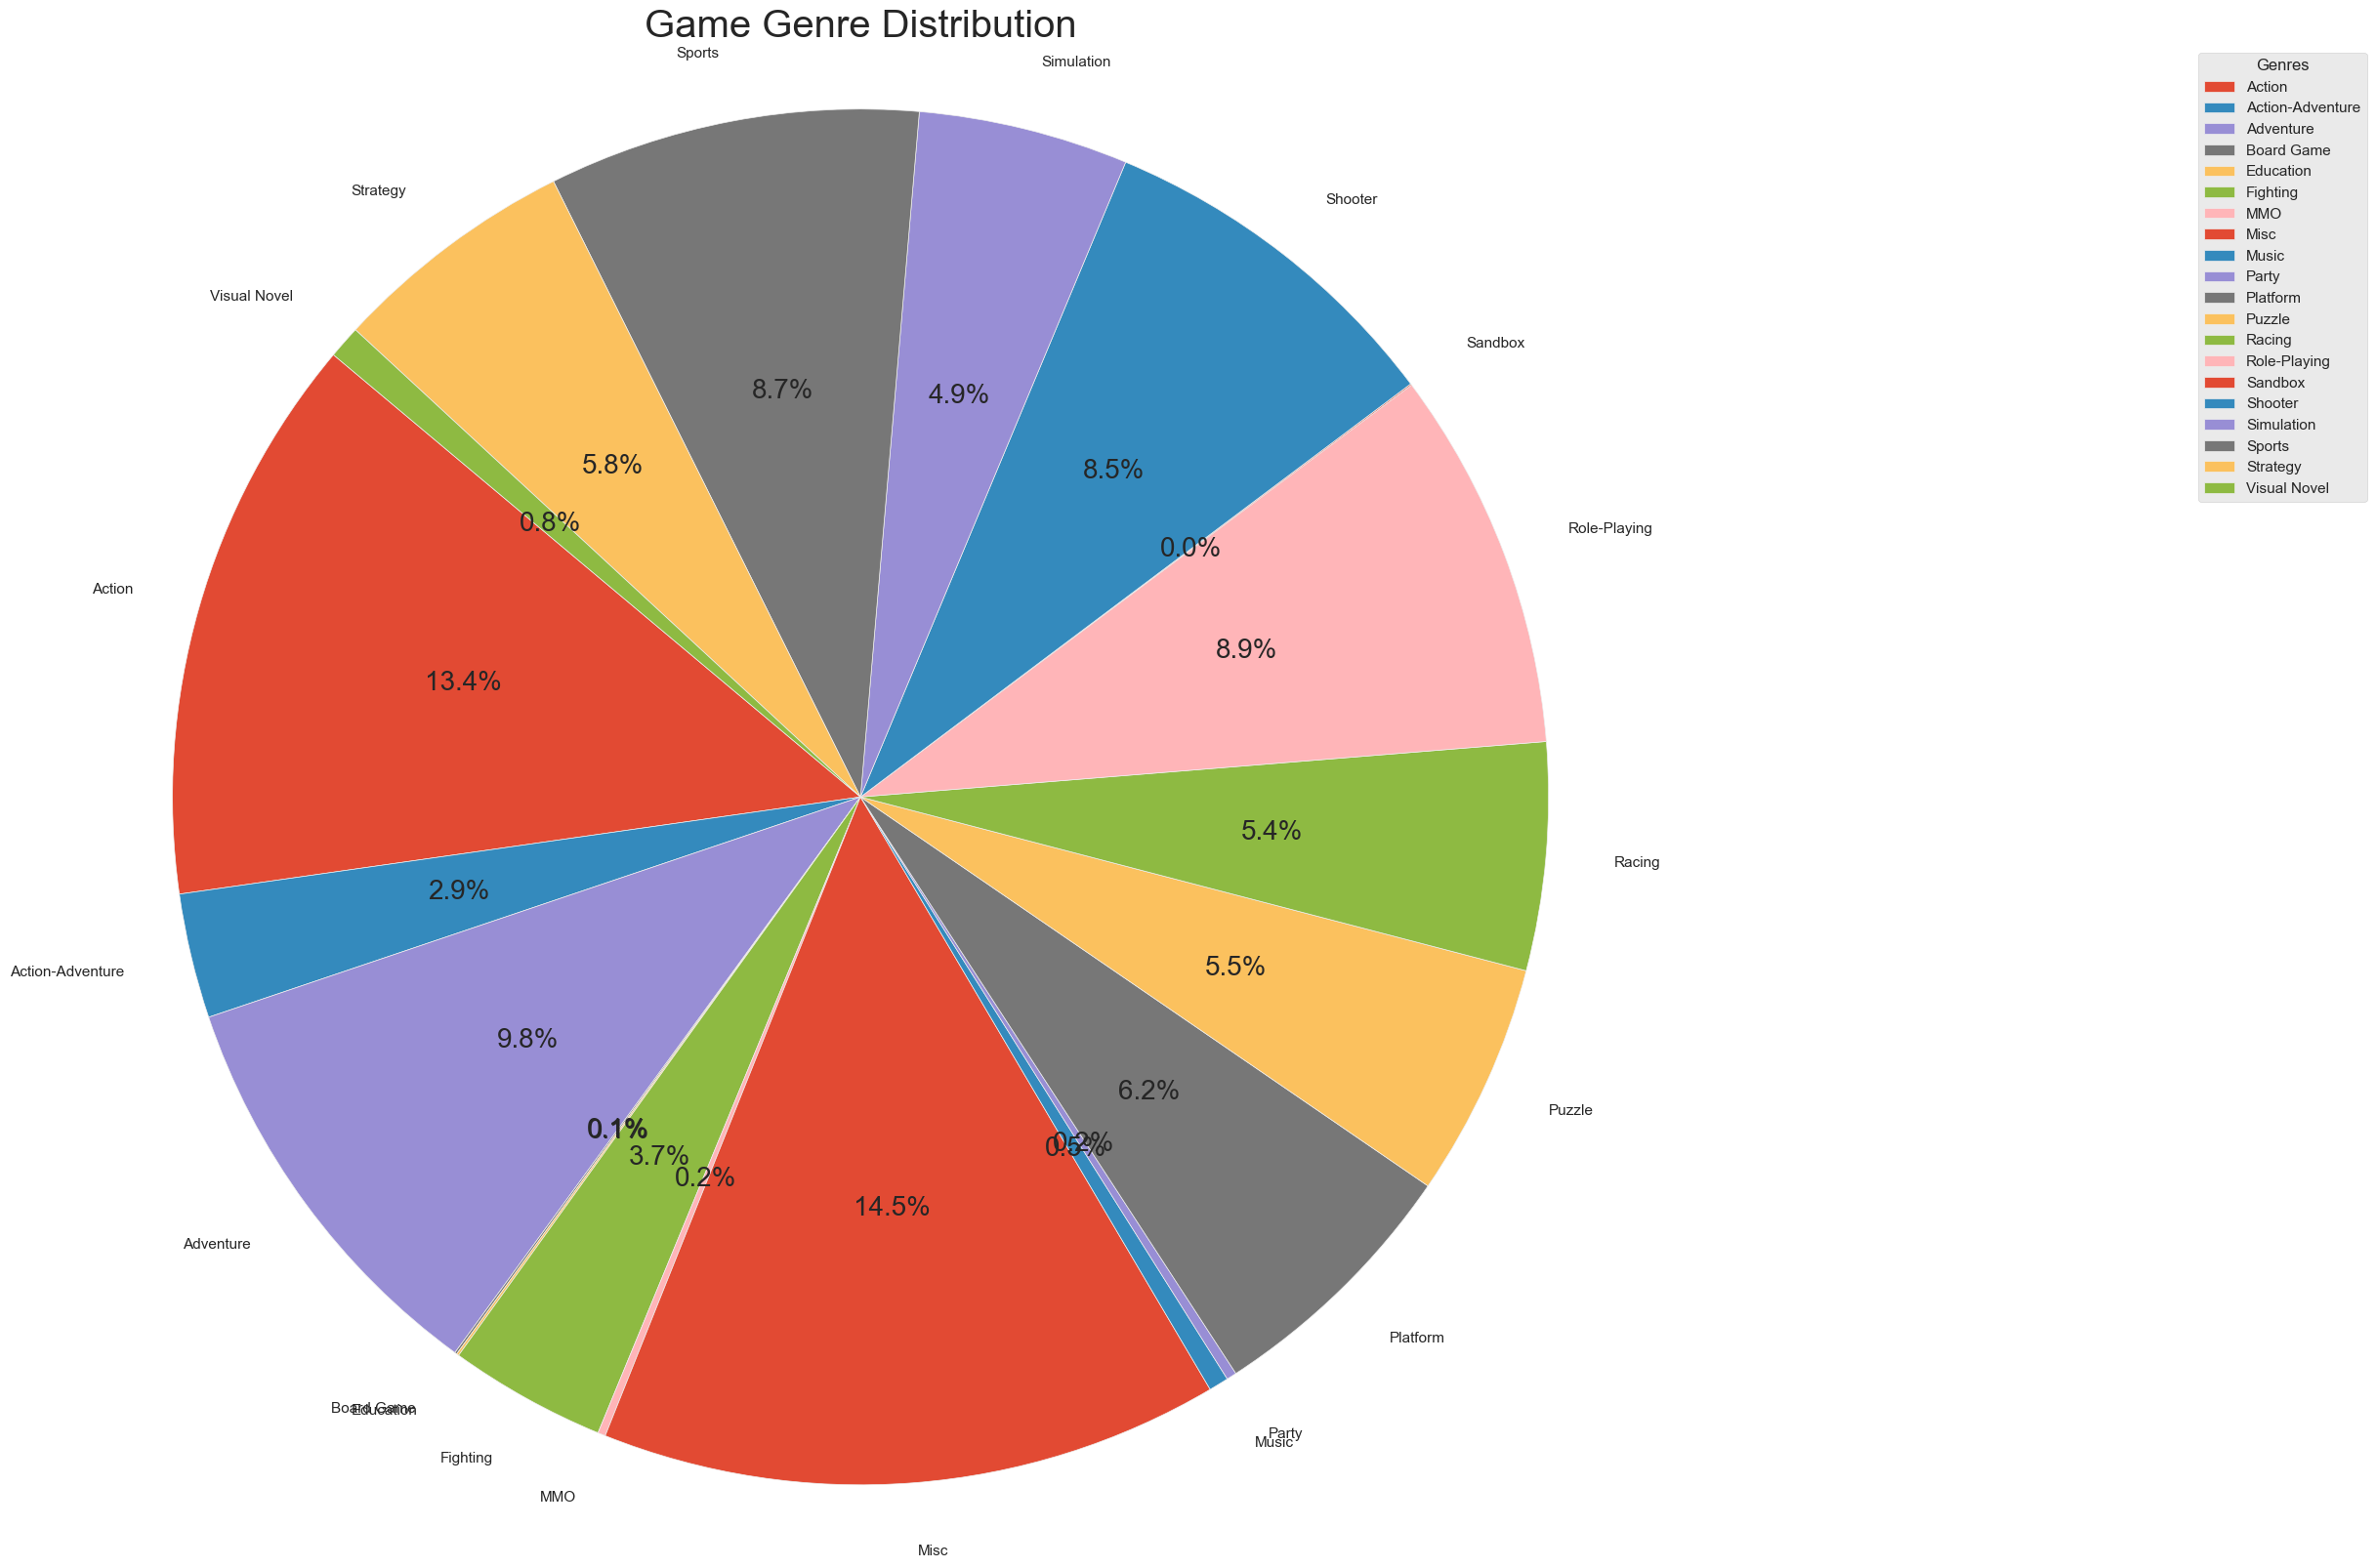

In [40]:
# Plot for what we just found
plt.style.use('ggplot')

# Group by genre and count the number of games in each genre
genre_counts = df.groupby('genre').size()

plt.style.use('ggplot')

# Increase figure size for better readability
plt.figure(figsize=(20, 20))

# Increase font size
plt.rcParams.update({'font.size': 20})

# Group by genre and count the number of games in each genre
genre_counts = df.groupby('genre').size()

# Plot the pie chart
wedges, texts, autotexts = plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Legend
plt.legend(wedges, genre_counts.index, title="Genres", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Game Genre Distribution')
plt.show()

The "Game Genre Distribution" shows how much each genre of video game makes up the overall number of total video games released. We can see that Misc has the highest total, at 9304 total games and 14.5% of the total number of releases. The lowest genre is Sandbox, with 20 total games and 0.03% of the total releases. Action is the second most popular, at 8557 total and 13.36% of the total releases.
However, because miscelleaneous could mean multiple types of genre that cannot be defined into a specific genre, it is safe to assume that the Action Genre is the most popular genre, followed by the Adventure genre.
Therefore, the decision makers should consider making more action and adventure genre of games.

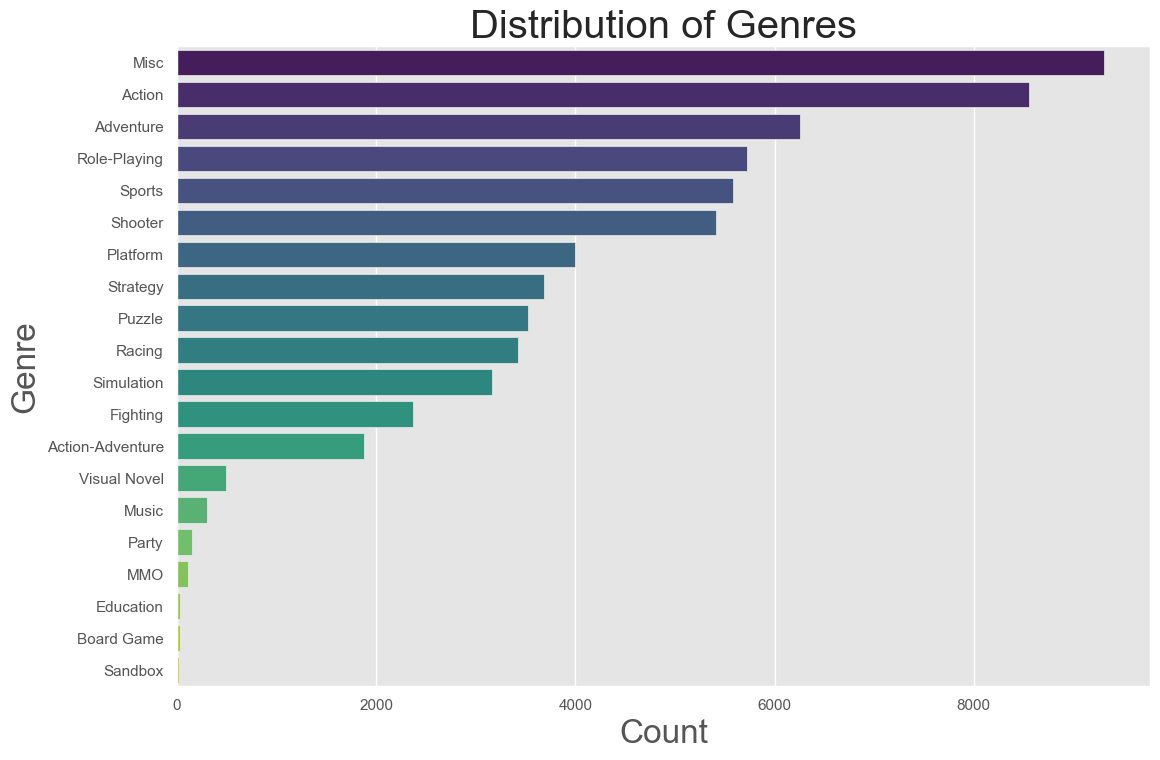

In [41]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjusted for better visibility

# Count plot of genres
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')

# Adding a title to the plot
plt.title('Distribution of Genres')
plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('Genre')  # Label for the y-axis

# Improve layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

A different way to visualize the distribution of genres

3.1.2 Average sales per genre

In [42]:
# Ensure 'total_sales' is a float
df['total_sales'] = pd.to_numeric(df['total_sales'], errors='coerce')

# Group by genre and calculate the average sales
average_sales_per_genre = df.groupby('genre')['total_sales'].mean()

# Print the result with custom formatting
print("Average sales per genre in millions:")
for genre, avg_sales in average_sales_per_genre.items():
    print(f"{genre:<20} {avg_sales:.2f}")


Average sales per genre in millions:
Action               0.40
Action-Adventure     0.56
Adventure            0.17
Board Game           0.11
Education            0.24
Fighting             0.39
MMO                  0.31
Misc                 0.28
Music                0.35
Party                0.21
Platform             0.37
Puzzle               0.18
Racing               0.37
Role-Playing         0.29
Sandbox              1.89
Shooter              0.67
Simulation           0.27
Sports               0.46
Strategy             0.14
Visual Novel         0.03


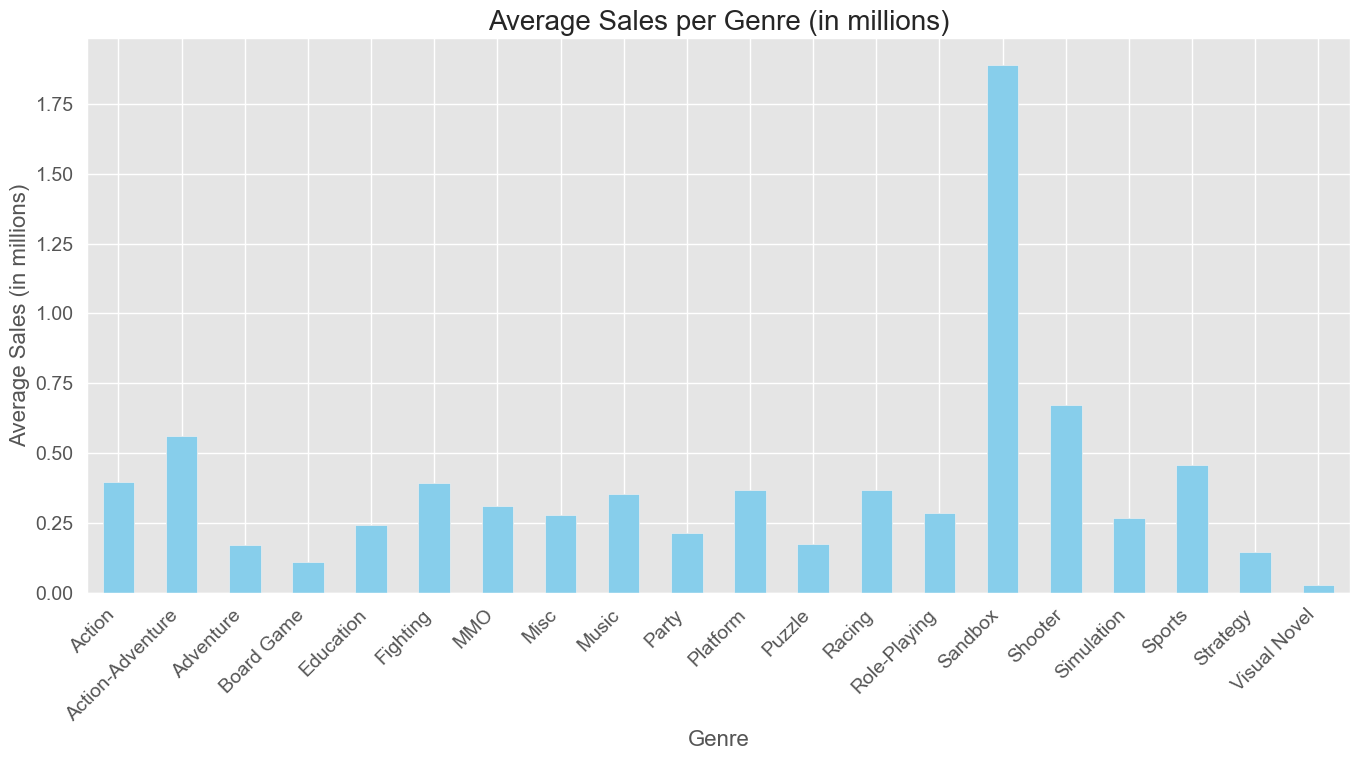

In [43]:
# Plot the bar graph
plt.figure(figsize=(14, 8))

# Plot the bar graph
average_sales_per_genre.plot(kind='bar', color='skyblue')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title and labels
plt.title('Average Sales per Genre (in millions)', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Average Sales (in millions)', fontsize=16)

# Optionally, you can adjust the font sizes for the tick labels as well
plt.tick_params(axis='both', which='major', labelsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

The Average Sales per Genre (in Millions) graph and its corresponding table above shows that the Sandbox Genre on average sells the most, with 1.89 million sales per game. 
The Visual Novel genre on average sells the least, with 0.03 million sales per game. Therefore, the decision makers should consider producing Sandbox genre of video games to maximize sales.

3.1.3 Distribution of Critic Scores

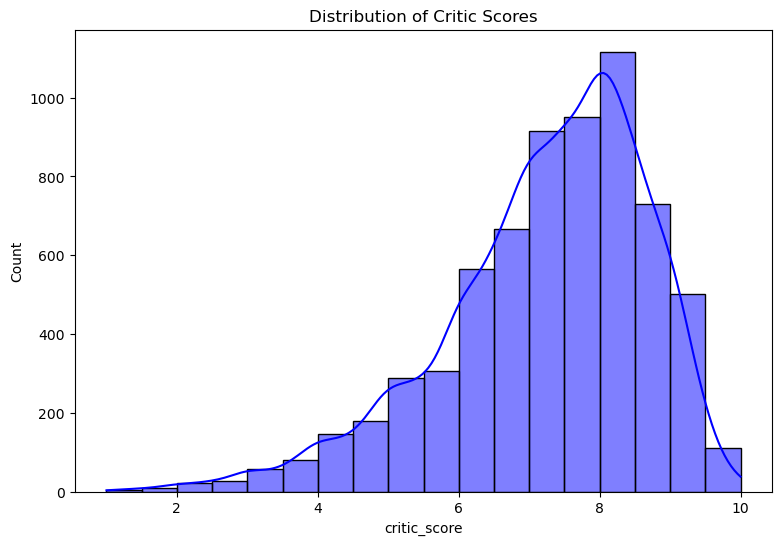

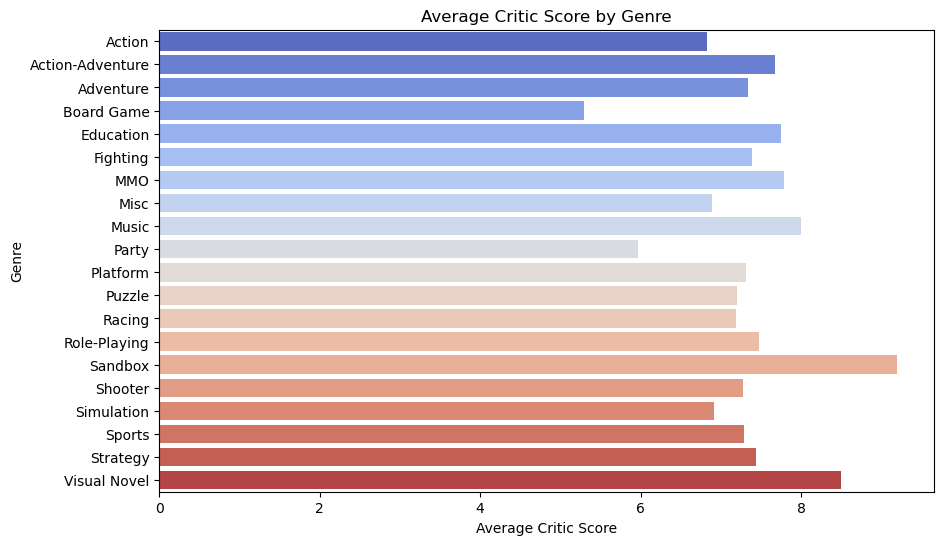

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(9, 6))

# Histogram plot of critic scores with a kernel density estimate
sns.histplot(df['critic_score'], kde=True, color="b", binwidth=0.5)

# Adding a title to the plot
plt.title('Distribution of Critic Scores')

# Show the plot
plt.show()

# Convert critic_score to numeric, forcing non-numeric values to NaN
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

# Group by 'genre' and calculate the mean of 'critic_score'
average_scores_per_genre = df.groupby('genre')['critic_score'].mean().reset_index()

# Display the average critic scores per genre
average_scores_per_genre

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
bar_plot = sns.barplot(x='critic_score', y='genre', data=average_scores_per_genre,
                       palette='coolwarm')

# Set the title and labels of the plot
plt.title('Average Critic Score by Genre')
plt.xlabel('Average Critic Score')
plt.ylabel('Genre')

# Show the plot
plt.show()

According to the Distribution of Critic Scores graph above, the most common score appears to be around the 7-8 range. The Average Critic Score by Genre graph also shows that on average, the Sandbox genre does the best among critics at an average of 9.2 while the Board Game genre does the worst at 5.3. Therefore, the decision makers can consider focusing more on producing Sandbox genre of video games.

In [ ]:
Scatter Plots

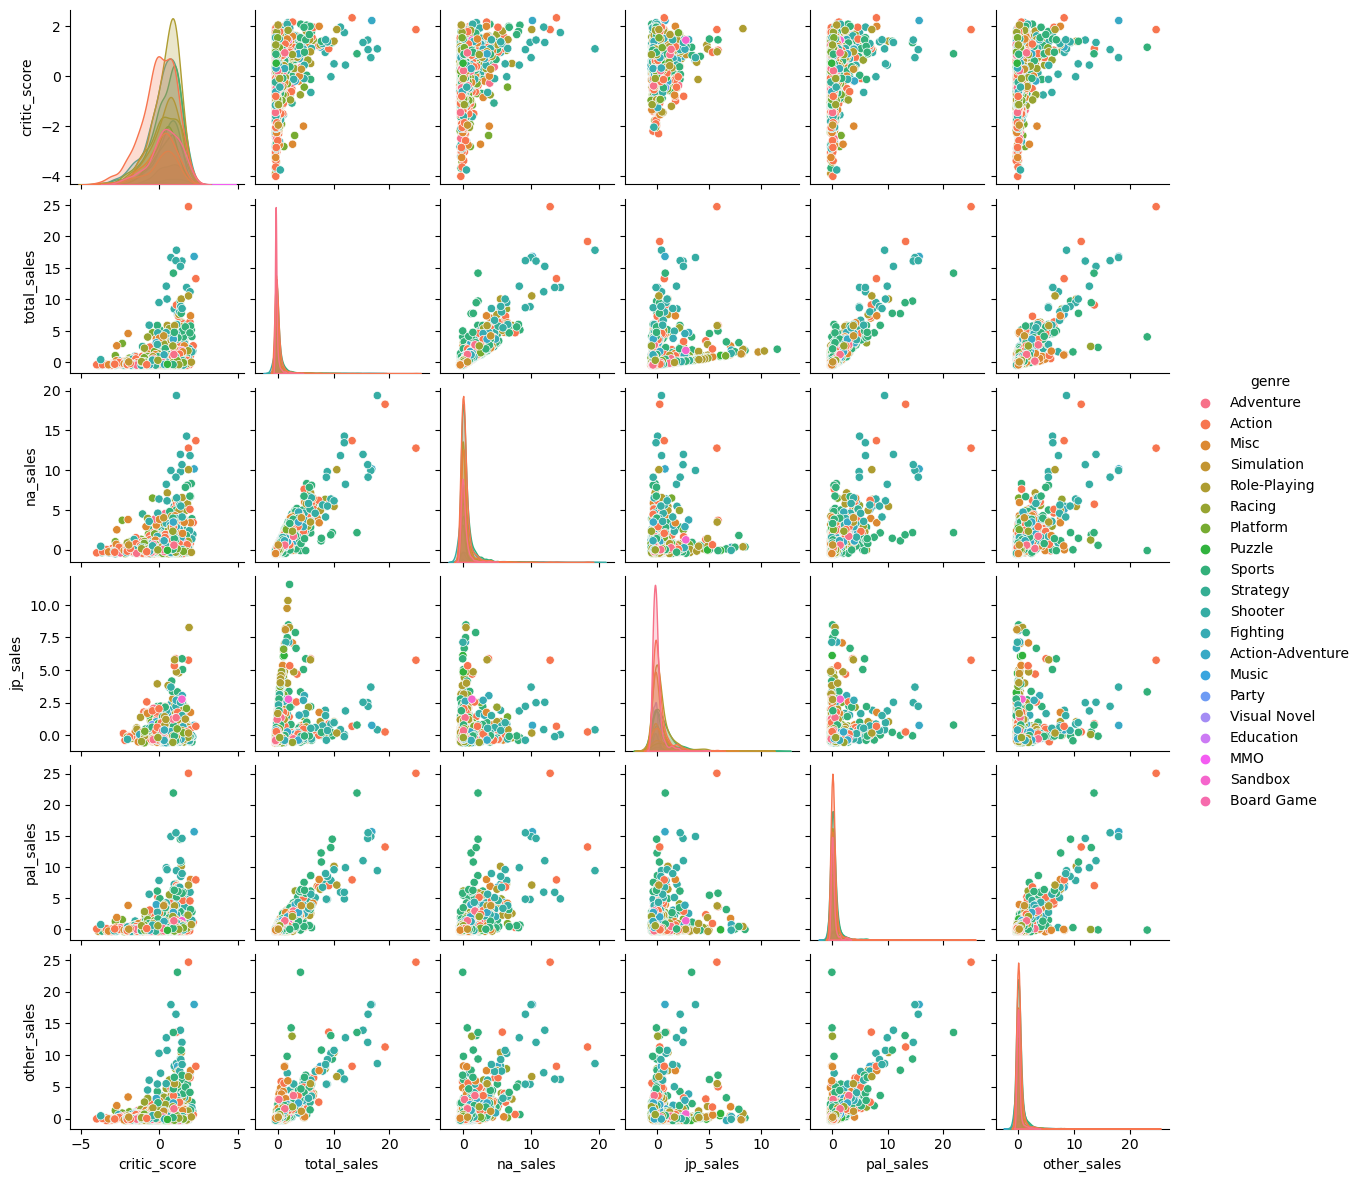

In [42]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import warnings

# Ignore UserWarning
warnings.filterwarnings("ignore", category=UserWarning)
# Preprocessing
# Identify numeric columns to scale, assuming they are 'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales'
numeric_columns = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
df_scaled = df.copy()
df_scaled[numeric_columns] = preprocessing.scale(df_scaled[numeric_columns])

# Sampling
df_sample = df_scaled.sample(frac=0.5, replace=False)  # Adjust the fraction if needed, 1% of 7 rows is less than 1 row.

# Jittering
# Assuming 'critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales' are the columns to jitter
jitter_columns = ['critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
df_sample_jitter = df_sample.copy()
df_sample_jitter[jitter_columns] = df_sample_jitter[jitter_columns].values + np.random.rand(len(df_sample_jitter), len(jitter_columns)) / 2 

# Scatterplot
# Use 'genre' or another categorical column for hue if applicable
sns.pairplot(df_sample_jitter, hue="genre", height=2)


From the matrix of the scatter plots, we can see that the above features are good classifiers for the target feature 'genre'

# 4. Additional Analysis